## Athenaのクエリ結果をpandasのDataFrameで取得

In [30]:
import os
import boto3
import pandas
import numpy
import matplotlib
import seaborn
from pyathena import connect

In [15]:
bucket = os.environ['bucket']
database_name = 'dsoaws'
table_name = 'amazon_reviews_parquet'
bucket

'aws-athena-query-results-ap-northeast-1-838023436798'

In [22]:
# pyathena connection
s3_staging_dir="s3://{0}/athena/staging".format(bucket)
s3_staging_dir
conn = connect(region_name='ap-northeast-1', s3_staging_dir=s3_staging_dir)

In [48]:
# Athena SQL query
statement = """
SELECT product_category, AVG(star_rating) AS avg_star_rating
FROM {}.{} 
GROUP BY product_category 
ORDER BY avg_star_rating DESC
LIMIT 10
""".format(
    database_name, table_name
)

print(statement)


SELECT product_category, AVG(star_rating) AS avg_star_rating
FROM dsoaws.amazon_reviews_parquet 
GROUP BY product_category 
ORDER BY avg_star_rating DESC
LIMIT 10



In [49]:
import pandas as pd

df = pd.read_sql(statement, conn)
df.head(5)

,product_category,avg_star_rating
0,Gift_Card,4.731363
1,Digital_Music_Purchase,4.636946
2,Music,4.440541
3,Books,4.340540
4,Digital_Ebook_Purchase,4.312491


In [50]:
# Store number of categories
num_categories = df.shape[0]
print(num_categories)

# Store average star ratings
average_star_ratings = df

10


## seabornでグラフを描画 

In [51]:
matplotlib.pyplot.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

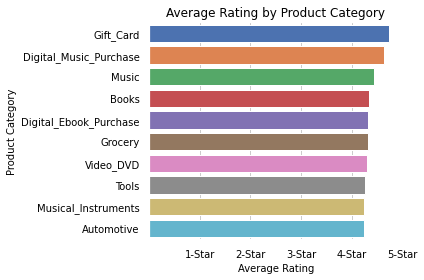

In [55]:
# 10個程度より多いとラベルが重なってしまう。調整方法はあるだろうけど調べていない。
barplot = seaborn.barplot(y="product_category", x="avg_star_rating", data=df, saturation=1)
# Set title and x-axis ticks
matplotlib.pyplot.title("Average Rating by Product Category")
matplotlib.pyplot.xticks([1, 2, 3, 4, 5], ["1-Star", "2-Star", "3-Star", "4-Star", "5-Star"])
matplotlib.pyplot.xlabel("Average Rating")
matplotlib.pyplot.ylabel("Product Category")
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show(barplot)